<a href="https://colab.research.google.com/github/7201krap/PYTORCH_introduction_to_pytorch/blob/main/7_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import torch.nn as nn 
import numpy as np 
from sklearn import datasets 
import matplotlib.pyplot as plt

In [8]:
# 0. prepare data 
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# 1. model
input_size  = n_features
output_size = 1 
model = nn.Linear(input_size, output_size)


# 2. loss and optimizer 
learning_rate = 0.1 
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


# 3. training loop
num_epochs = 100 
for epoch in range(num_epochs):
    # forward pass and loss 
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # backward pass 
    loss.backward() # backpropagation & calculate gradients 

    # update
    optimizer.step()

    # empty gradients 
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print("epoch:", epoch+1, "loss:", loss.item())

epoch: 10 loss: 582.0986938476562
epoch: 20 loss: 341.06622314453125
epoch: 30 loss: 332.86297607421875
epoch: 40 loss: 332.577880859375
epoch: 50 loss: 332.56793212890625
epoch: 60 loss: 332.567626953125
epoch: 70 loss: 332.56756591796875
epoch: 80 loss: 332.56756591796875
epoch: 90 loss: 332.56756591796875
epoch: 100 loss: 332.56756591796875


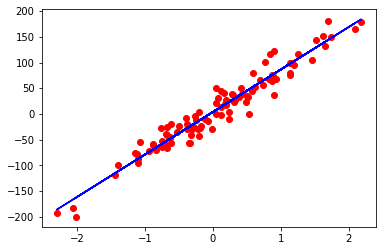

In [9]:
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()